## Original data vs Compress data

In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)

In [2]:
import numpy as np
import  matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

data = mnist.data.astype(np.uint8)
target = mnist.target

X_train, X_test, y_train, y_test = train_test_split(data, target,test_size=.2, random_state=11)

original data

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import time

RDF_model = RandomForestClassifier(n_estimators=100, random_state=11)
t0  = time.time()
RDF_model.fit(X_train, y_train)
t1  = time.time()
print('Training took {:.2f}s'.format(t1-t0))

y_pred = RDF_model.predict(X_test)
print('with accuracy = {:.2f}%'.format(accuracy_score(y_test,y_pred)*100))

Training took 34.85s
with accuracy = 96.90%


with PCA to reduce dimensionallity.

In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components=.95)
X_train_reduce = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)

RDF_model = RandomForestClassifier(n_estimators=100, random_state=11)
t0  = time.time()
RDF_model.fit(X_train_reduce, y_train)
t1  = time.time()
print('Training took {:.2f}s'.format(t1-t0))

y_pred = RDF_model.predict(X_test_reduced)
print('with accuracy = {:.2f}%'.format(accuracy_score(y_test,y_pred)*100))

Training took 110.85s
with accuracy = 94.66%


> dimensionality reduction does not always lead to faster training time: it depends on the dataset, the model and the training algorithm

>  performance to drop slightly when reducing dimensionality, because we do lose some useful signal in the process

what if we use Support Vector Machine Classifier

In [5]:
from sklearn.svm import SVC

SVC_model = SVC()
t0  = time.time()
SVC_model.fit(X_train, y_train)
t1  = time.time()
print('Training took {:.2f}s'.format(t1-t0))

y_pred = SVC_model.predict(X_test)
print('with accuracy = {:.2f}%'.format(accuracy_score(y_test,y_pred)*100))

Training took 252.53s
with accuracy = 97.83%


In [6]:
SVC_model = SVC()
t0  = time.time()
SVC_model.fit(X_train_reduce, y_train)
t1  = time.time()
print('Training took {:.2f}s'.format(t1-t0))

y_pred = SVC_model.predict(X_test_reduced)
print('with accuracy = {:.2f}%'.format(accuracy_score(y_test,y_pred)*100))

Training took 90.71s
with accuracy = 98.13%


> with PCA is perform better and faster.

### Can we plot mnist dataset with 784 features in 2D graph

Dimensionality reduction on the full 60,000 images takes a very long time, so let's only do this on a random subset of 10,000 images:

In [7]:
np.random.seed(11)
m = 10000
index = np.random.permutation(len(data))[:10000] # get 0-10000 index that random

X = mnist.data.astype(np.uint8)[index]
y = mnist.target.astype(np.uint8)[index]

Now let's use t-SNE to reduce dimensionality down to 2D so we can plot the dataset:

c:\Users\alant\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\alant\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


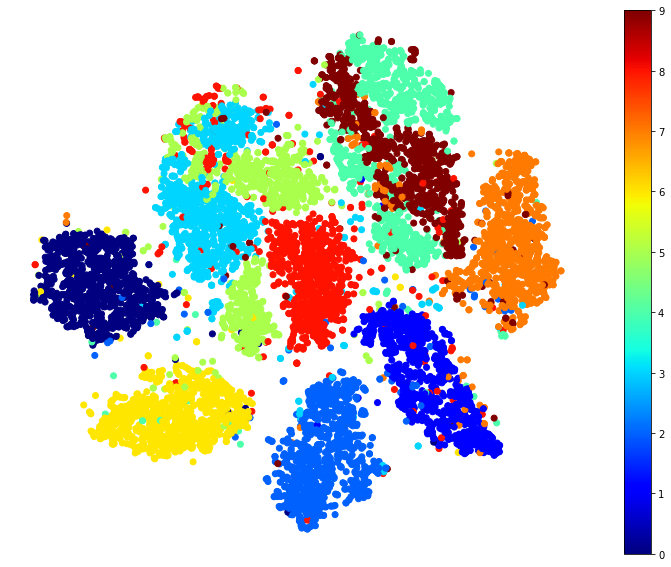

In [8]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=11)
X_reduced = tsne.fit_transform(X)

plt.figure(figsize=(13,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap="jet")
plt.axis('off')
plt.colorbar()
plt.show()

>  This plot tells us which numbers are easily distinguishable from the others 

In [9]:
from sklearn.preprocessing import MinMaxScaler
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

def plot_digits(X, y, min_distance=0.05, images=None, figsize=(13, 10)):
    X_normalized = MinMaxScaler().fit_transform(X) # scale 0 to 1
    # Now we create the list of coordinates of the digits plotted so far.
    # We pretend that one is already plotted far away at the start, to
    # avoid `if` statements in the loop below
    neighbors = np.array([[10., 10.]])

    plt.figure(figsize=figsize)
    cmap = plt.cm.get_cmap("jet")
    digits = np.unique(y)
    for digit in digits:
        plt.scatter(X_normalized[y == digit, 0], X_normalized[y == digit, 1], c=[cmap(digit / 9)])
    plt.axis("off")
    
    ax = plt.gcf().gca()  # get current axes in current figure
    for index, image_coord in enumerate(X_normalized):
        closest_distance = np.linalg.norm(neighbors - image_coord, axis=1).min()
        if closest_distance > min_distance:
            neighbors = np.r_[neighbors, [image_coord]]
            if images is None:
                plt.text(image_coord[0], image_coord[1], str(int(y[index])),
                         color=cmap(y[index] / 9), fontdict={"weight": "bold", "size": 16})
            else:
                image = images[index].reshape(28, 28)
                imagebox = AnnotationBbox(OffsetImage(image, cmap="binary"), image_coord)
                ax.add_artist(imagebox)

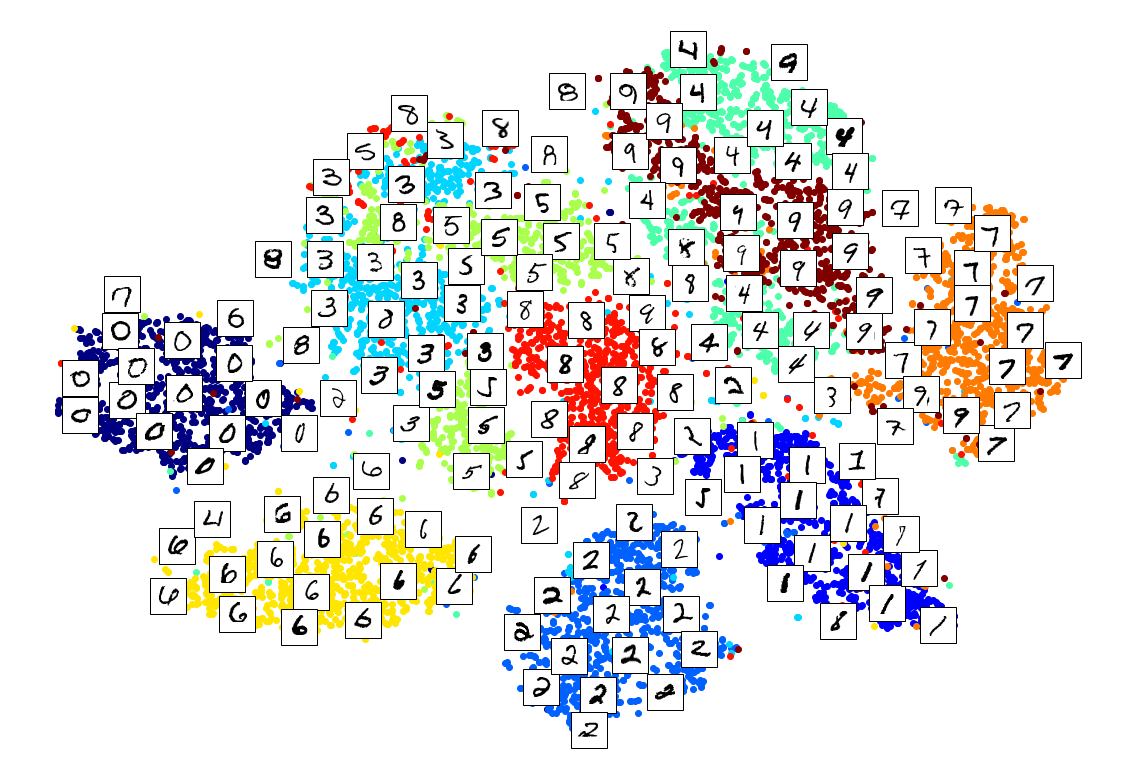

In [10]:
plot_digits(X_reduced, y, images=X, figsize=(20, 14))

Let's start with PCA. We will also time how long it takes:

PCA took 0.3s.


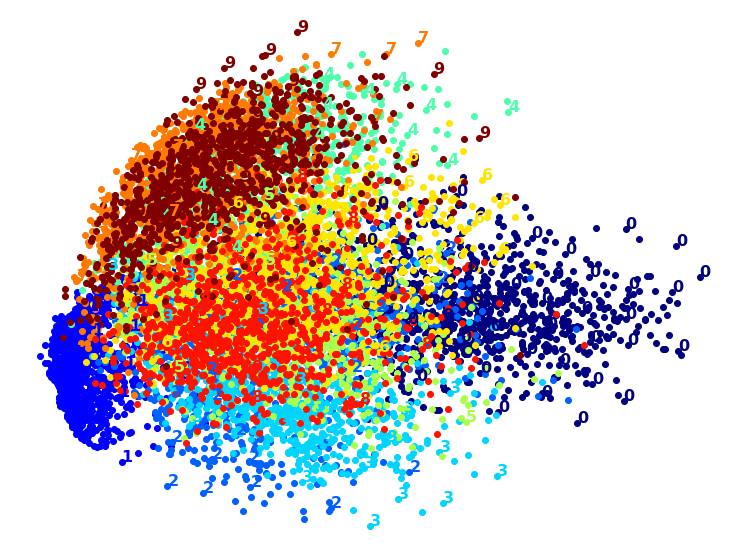

In [11]:
t0 = time.time()
X_pca_reduced = PCA(n_components=2, random_state=42).fit_transform(X)
t1 = time.time()
print("PCA took {:.1f}s.".format(t1 - t0))
plot_digits(X_pca_reduced, y)
plt.show()

> Wow, PCA is blazingly fast! But although we do see a few clusters, there's way too much overlap.

 Let's see if a bit of PCA can speed it up:

c:\Users\alant\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\alant\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


PCA+t-SNE took 56.1s.


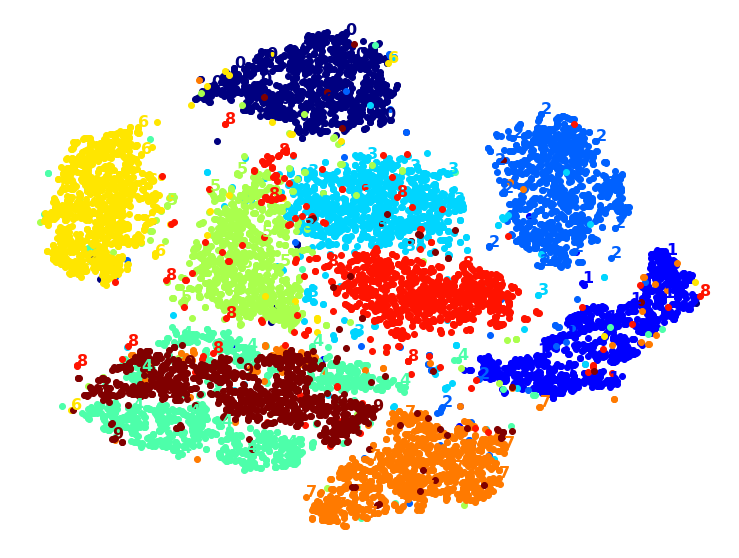

In [13]:
from sklearn.pipeline import Pipeline

pca_tsne = Pipeline([
    ("pca", PCA(n_components=0.95, random_state=42)),
    ("tsne", TSNE(n_components=2, random_state=42)),
])
t0 = time.time()
X_pca_tsne_reduced = pca_tsne.fit_transform(X)
t1 = time.time()
print("PCA+t-SNE took {:.1f}s.".format(t1 - t0))
plot_digits(X_pca_tsne_reduced, y)
plt.show()